# Basic Convolutio Layer on Fashion MNIST

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipw
import tensorflow as tf
from ipywidgets import interactive
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.gridspec as gridspec

## Load data

In [5]:
data = input_data.read_data_sets('/data/fashion/')
class_id2class_name_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'}

Extracting /data/fashion/train-images-idx3-ubyte.gz
Extracting /data/fashion/train-labels-idx1-ubyte.gz
Extracting /data/fashion/t10k-images-idx3-ubyte.gz
Extracting /data/fashion/t10k-labels-idx1-ubyte.gz


## Neural net inputs

#### Input Image

In [6]:
batch_size = 10
images = data.validation.images[:batch_size]
images, _ = data.train.next_batch(batch_size)

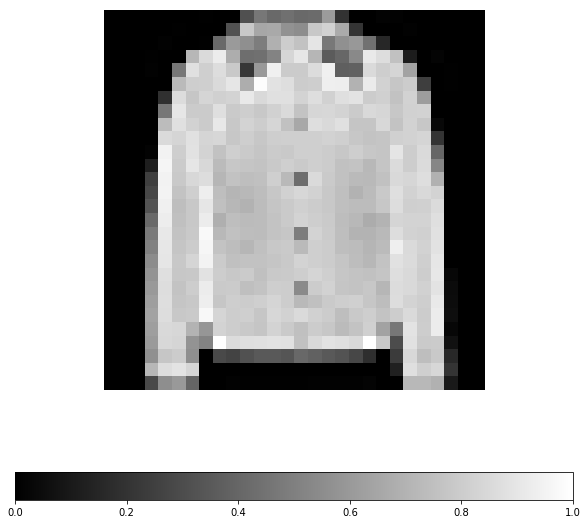

In [7]:
image_id = 1
assert image_id < batch_size
image = images[image_id].reshape(28,28)

plt.figure(figsize=(10, 10))
im = plt.imshow(image, cmap='gray')
plt.colorbar(im, orientation='horizontal')
plt.gca().axes.set_axis_off()

#### Convolution filter

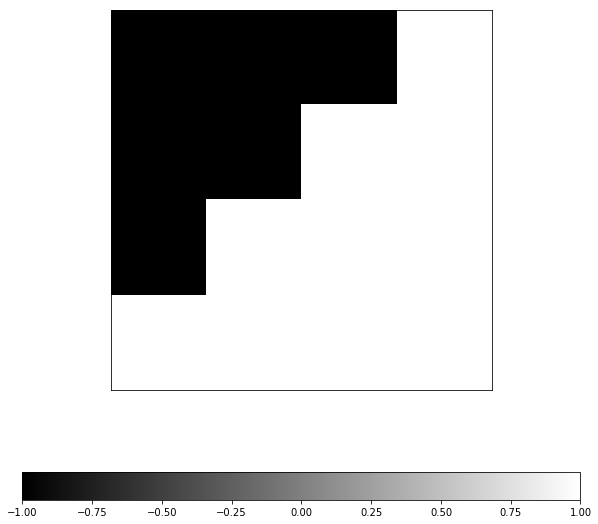

In [8]:
conv_filter = np.array(
    [[-1, -1, -1, 1], 
     [-1, -1, 1, 1], 
     [-1, 1, 1, 1],
     [1, 1, 1, 1]], dtype=np.float32)

plt.figure(figsize=(10, 10))
im = plt.imshow(conv_filter, cmap='gray')
plt.colorbar(im, orientation='horizontal')
ax = plt.gca()
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())


## Parameters Setup

#### Stride and Padding

In [9]:
stride_row = 1
stride_col = 1
padding = "VALID"

#### Reshape Image and Filter

In [10]:
image_reshaped = image.reshape((1, 28, 28, 1))

conv_filter_shape = conv_filter.shape
conv_filter_reshaped = conv_filter.reshape(conv_filter_shape[0], conv_filter_shape[1], 1, 1)

In [11]:
conv_filter_reshaped.shape

(4, 4, 1, 1)

In [12]:
image_reshaped.shape

(1, 28, 28, 1)

## Run Convolution Net

In [13]:
graph = tf.Graph()
with graph.as_default():
    tf_image = tf.constant(image_reshaped)
    tf_conv_filer = tf.constant(conv_filter_reshaped)
    tf_conv_layer = tf.nn.conv2d(tf_image, tf_conv_filer, 
                                 strides=[1, stride_row, stride_col, 1], padding=padding)

In [14]:
with tf.Session(graph=graph) as sess:
    conv_layer = sess.run(tf_conv_layer)[0]

## Observe Convolution Layer Output Shape

In [15]:
conv_layer.shape

(25, 25, 1)

In [16]:
if padding == 'VALID':
    conv_layer_shape = (np.floor((28 - conv_filter_shape[0] + stride_row) / stride_row).astype(int), 
                        np.floor((28. - conv_filter_shape[1] + stride_col) / stride_col).astype(int))
elif padding == 'SAME':
    conv_layer_shape = (np.ceil(28 / stride_row).astype(int), 
                        np.ceil(28 /stride_col).astype(int))
conv_layer_shape

(25, 25)

## Visualizations

In [17]:
conv_layer = conv_layer.reshape(conv_layer_shape)

#### Input vs. Convolution Layer

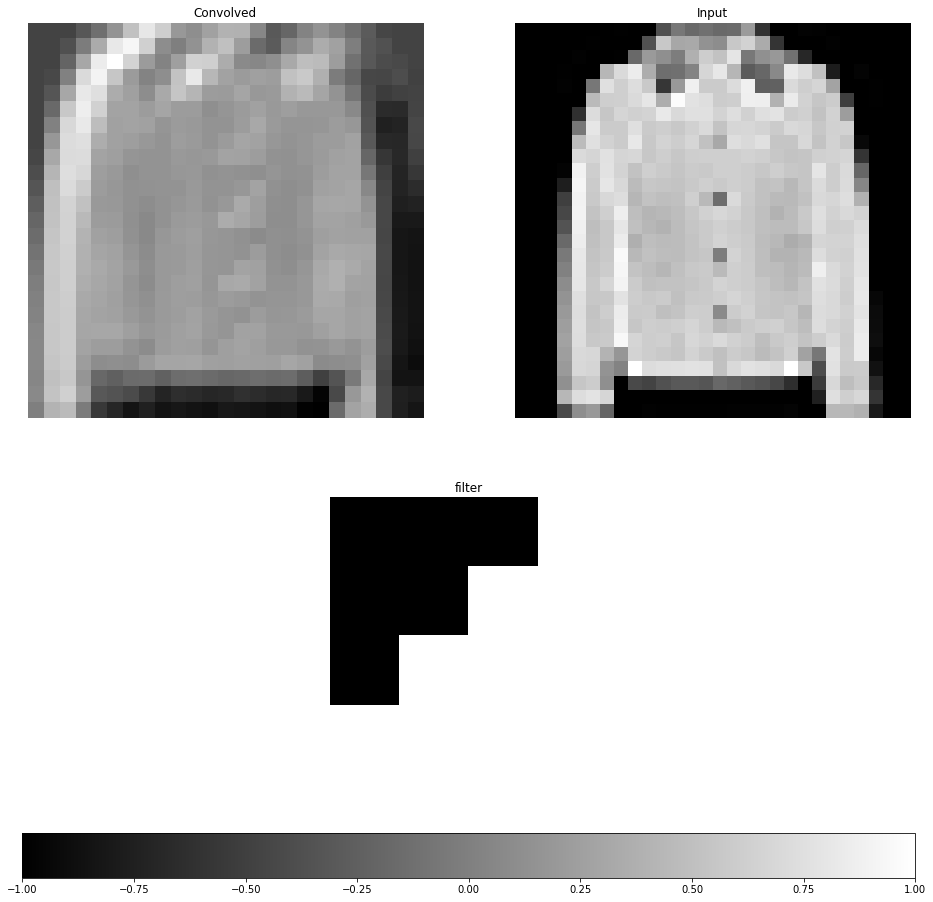

In [18]:
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(2, 2)

ax = plt.subplot(gs[0, 0])
plt.title("Convolved")
im = plt.imshow(conv_layer, cmap='gray')
plt.gca().axes.set_axis_off()

ax = plt.subplot(gs[0, 1])
plt.title('Input')
im = plt.imshow(image, cmap='gray')
plt.gca().axes.set_axis_off()


ax = plt.subplot(gs[1, :2])
plt.title('filter')
im = plt.imshow(conv_filter, cmap='gray')
plt.colorbar(im, orientation='horizontal')



plt.gca().axes.set_axis_off()

#### Sensitivity of Image Features

In [19]:
conv_layer_max = conv_layer.max()
def plot_conv_layer(tolerance):
    conv_layer_filtered = (conv_layer >= (conv_layer_max - tolerance)).astype(int)
    fig = plt.figure(figsize=(10, 10))
    im = plt.imshow(conv_layer_filtered, cmap='gray')
    plt.colorbar(im, orientation='horizontal')
    plt.gca().axes.set_axis_off()
    plt.show()
    
interactive(plot_conv_layer, 
            tolerance=ipw.FloatSlider(0.5, min=0, max=conv_layer_max - 0.1, step=0.01))

interactive(children=(FloatSlider(value=0.5, description='tolerance', max=6.668628120422364, step=0.01), Output()), _dom_classes=('widget-interact',))

#### Interactive Convolution Filter
 - top
 - left
 - bottom
 - right
 - diag_left
 - diag_righ
 - half_top
 - bottom_half

In [22]:
from utils.nn_visualization import conv_filter_widget
conv_filter_widget(image, conv_filter_shape=[4, 4], stride_col=1, stride_row=1, init_mode='diag_left')

VBox(children=(VBox(children=(HBox(children=(BoundedFloatText(value=-1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=-1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1)), layout=Layout(align_items='stretch')), HBox(children=(BoundedFloatText(value=1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=-1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=-1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1)), layout=Layout(align_items='stretch')), HBox(children=(BoundedFloatText(value=1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1)), layout=Layout(align_items='stretch')), HBox(children=(BoundedFloatText(value=-1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=-1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1), BoundedFloatText(value=1.0, layout=Layout(height='200px', margin='0px 0px 0px 0px', padding='0px 0px 0px 0px', width='200px'), max=1.0, min=-1.0, step=0.1)), layout=Layout(align_items='stretch'))), layout=Layout(height='430px', padding='15px 0px 0px 30px', width='430px')), Output()), layout=Layout(margin='50px 30px 50px 50px'))